In [93]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

def laplace_mech(v, sensitivity, epsilon):
    return v + np.random.laplace(loc=0, scale=sensitivity / epsilon)

def gaussian_mech(v, sensitivity, epsilon, delta):
    return v + np.random.normal(loc=0, scale=sensitivity * np.sqrt(2*np.log(1.25/delta)) / epsilon)

def pct_error(orig, priv):
    return np.abs(orig - priv)/orig * 100.0

compas = pd.read_csv('https://github.com/twiemold/CS211_Thomas_Wiemold_Final_Project/raw/main/compas-scores-two-years.csv')

idxs_to_drop = []
for i in range(len(compas)):
        if compas['is_recid'][i] == -1:
            idxs_to_drop.append(i)
        elif compas['c_charge_degree'][i] == "O":
            idxs_to_drop.append(i)
        elif compas['score_text'][i] == 'N/A':
            idxs_to_drop.append(i)
        elif compas['days_b_screening_arrest'][i]  >= 30:
            idxs_to_drop.append(i)
        elif compas['days_b_screening_arrest'][i]  <= -30:
            idxs_to_drop.append(i)
        else:
            i += 1
for i in range(len(idxs_to_drop)):
    compas.drop(
        labels = [idxs_to_drop[i]],
        axis = 0,
        inplace = True
    )
            
            
            
            
            
            
            

In [91]:
compas

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,...,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid
0,1,miguel hernandez,miguel,hernandez,2013-08-14,Male,1947-04-18,69,Greater than 45,Other,...,1,Low,2013-08-14,2014-07-07,2014-07-14,0,0,327,0,0
1,3,kevon dixon,kevon,dixon,2013-01-27,Male,1982-01-22,34,25 - 45,African-American,...,1,Low,2013-01-27,2013-01-26,2013-02-05,0,9,159,1,1
2,4,ed philo,ed,philo,2013-04-14,Male,1991-05-14,24,Less than 25,African-American,...,3,Low,2013-04-14,2013-06-16,2013-06-16,4,0,63,0,1
3,5,marcu brown,marcu,brown,2013-01-13,Male,1993-01-21,23,Less than 25,African-American,...,6,Medium,2013-01-13,NaN,NaN,1,0,1174,0,0
4,6,bouthy pierrelouis,bouthy,pierrelouis,2013-03-26,Male,1973-01-22,43,25 - 45,Other,...,1,Low,2013-03-26,NaN,NaN,2,0,1102,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7209,10996,steven butler,steven,butler,2013-11-23,Male,1992-07-17,23,Less than 25,African-American,...,5,Medium,2013-11-23,2013-11-22,2013-11-24,0,1,860,0,0
7210,10997,malcolm simmons,malcolm,simmons,2014-02-01,Male,1993-03-25,23,Less than 25,African-American,...,5,Medium,2014-02-01,2014-01-31,2014-02-02,0,1,790,0,0
7211,10999,winston gregory,winston,gregory,2014-01-14,Male,1958-10-01,57,Greater than 45,Other,...,1,Low,2014-01-14,2014-01-13,2014-01-14,0,0,808,0,0
7212,11000,farrah jean,farrah,jean,2014-03-09,Female,1982-11-17,33,25 - 45,African-American,...,2,Low,2014-03-09,2014-03-08,2014-03-09,3,0,754,0,0


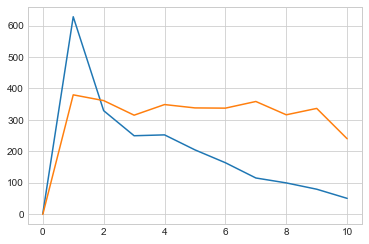

In [101]:
def score_race_hist(epsilon, race):
    # uses parallel composition, histogram
    counts = [len(compas[(compas['decile_score'] == i) & (compas['race'] == race)]) for i in range(0,11)]
    noisy_counts = [laplace_mech(c, 1, epsilon) for c in counts]
    return noisy_counts

plt.plot(score_race_hist(1.0, 'Caucasian'));
plt.plot(score_race_hist(1.0, 'African-American'));